# **Oficina 9**

Nesta prática de análise de sentimentos, foram aplicados conceitos fundamentais de pré-processamento e treinamento de modelos com textos. Para o pré-processamento, utilizei a técnica **TfidfVectorizer**, que automaticamente realiza a tokenização do texto e a remoção de *stop words*. Além disso, o dataset foi dividido em conjuntos de treino e teste, garantindo uma avaliação justa do modelo.

O pré-processamento desempenha um papel essencial, pois reduz a dimensionalidade do texto, eliminando palavras irrelevantes que poderiam prejudicar o desempenho do modelo. A tokenização e a remoção de *stop words* ajudam o modelo a focar apenas nos termos mais importantes para a análise de sentimentos. Outro ponto crucial é a conversão das palavras em uma representação numérica, necessária para que os algoritmos possam processar os dados e realizar os cálculos matemáticos. Essas etapas garantem que o modelo seja mais eficiente e preciso em suas previsões.

Para a classificação dos sentimentos, utilizei o modelo Naive Bayes, que é amplamente reconhecido como uma escolha ideal para tarefas de mineração de texto e análise de sentimentos. Isso se deve às suas principais características:



*   Eficiência e Simplicidade: O Naive Bayes é computacionalmente leve e rápido, mesmo em grandes conjuntos de dados, o que o torna perfeito para tarefas envolvendo muitas amostras, como análises de texto.
*   Probabilidade Condicional: Ele calcula a probabilidade de uma classe com base nas palavras presentes no texto, assumindo que as características (palavras) são independentes umas das outras.



 Durante o treinamento, o Naive Bayes calcula a probabilidade de cada palavra aparecer em textos das classes "positivo" e "negativo", baseando-se nas frequências das palavras em cada classe no conjunto de treino.

 Após todo este procedimento, apliquei a acurácia para avaliar o desempenho do modelo. O que foi mostrado foi uma acurácia de 77%, o que podemos considerar um resultado consideravelmente bom.

In [108]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [109]:
import pandas as pd

df = pd.read_csv('imdb_labelled.txt', sep='\t', header=None, names=['text', 'label'])

In [110]:
df.head()

,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [111]:
X = df['text']
y = df['label']

In [112]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('model', MultinomialNB())
])

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('model', MultinomialNB())])

Acurácia: 0.77
              precision    recall  f1-score   support

           0       0.83      0.70      0.76        76
           1       0.73      0.85      0.79        74

    accuracy                           0.77       150
   macro avg       0.78      0.77      0.77       150
weighted avg       0.78      0.77      0.77       150



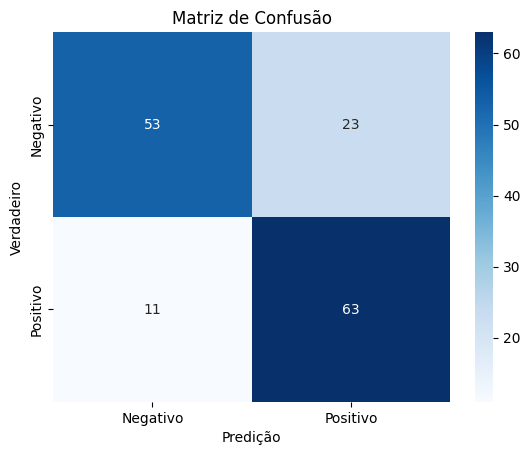

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predições
y_pred = pipeline.predict(X_test)

# Avaliação
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Relatório detalhado
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()